<a href="https://colab.research.google.com/github/meena25091992/Meenakshi-Hotel-Booking/blob/main/Individual_Notebook_Stock_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:-

>Yes Bank is a well-known bank in the Indian financial domain. Since 2018,it has been in the news because of the fraud case involving Rana Kapoor.Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. 



# Business Goal:-

> The main objective is to predict the stock's closing price of the month.




In [105]:
# Importing the libraries

import numpy as np                #  Import numpy for mathematical calculation
import pandas as pd               #  Import pandas for data wrangling
import matplotlib.pyplot as plt   #  Import matplolib and seaborn for Data Visualization
import seaborn as sns
from datetime import datetime     # Import datetime to convert date column into proper format
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [106]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
# Importing Dataset and read files

file_path = '/content/drive/MyDrive/Meenakshi_Supervised_ML_Capestone_Project/data_YesBank_StockPrices.csv'
yes_bank_df = pd.read_csv(file_path)

yes_bank_df.shape # fetching number of rows and columns from dataframe

(185, 5)

In [108]:
# fetching first five rows from dataset using head() function

yes_bank_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [109]:
# fetch basic information about the features in our dataframe

yes_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [110]:
# creating a copy of dataframe so that our original dataset not reflect 
stock_price_df = yes_bank_df.copy()


In [111]:
# check if there is any null value or not
stock_price_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [112]:
# check for any duplicate row or not
len(stock_price_df[stock_price_df.duplicated()])

0

# Dataset Description:-
  We have a dataset of YES BANK which contain monthly stock prices of bank since its opening.It contain multiple features like:-


*   **Date :-** Date denotes the date of investment(date contains month and year for a particular price) (Object)
* **Open :-** means the price at which a stock started trading   (Numerical).
*  **High :-**The high is the highest price at which a stock traded during a period (Numerical).
*  **Low :-**The low is the minimum price at which a stock traded during a period (Numerical).
*  **Close :-** The closing price refers to a stock's trading price closed at the end of a trading day (Numerical).It's a depenedent variable which we need to predict from our respetive ML models.



  

In [113]:
""" The describe() function computes a summary of statistics pertaining to the DataFrame columns.
    This function gives the mean, std and IQR values. And, function excludes the character columns 
    and given summary about numeric columns.
"""
stock_price_df.describe(include='all') 

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [114]:
# check the format of "Date" column

stock_price_df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

*  
From the above output,We have seen that the format of Date is **"MMMM-YY"** .So we need to convert in proper date format **"YYYY-MM-DD"**.Also,convert **year** into numeric format .




In [115]:
# Converting 'Date' into datetime - 'YYYY-MM-DD' format
# Using Pandas to_datetime() method helps to convert string Date time into Python Date time object.

stock_price_df['Date'] = pd.to_datetime(stock_price_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))
stock_price_df['Date'] 

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]



*   But the problem is that our ML model like Linear Regression doesn't work on "Date" data.So we need to convert it into numerical column.But, numerical date have no use in our respetive dataframe to predict the goal .So,make the "Date" column as dataframe index .



In [116]:
# Make "Date" column as index of the dataframe

stock_price_df.set_index('Date', inplace=True)

In [117]:
# check the changes 

stock_price_df.tail()

,Open,High,Low,Close
Date,,,,
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15
2020-10-01,13.30,14.01,12.11,12.42
2020-11-01,12.41,14.90,12.21,14.67


In [118]:
# Now only 4 columns are left in the respective dataframe

stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-01 to 2020-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 7.2 KB


# Exploratory Data Analysis

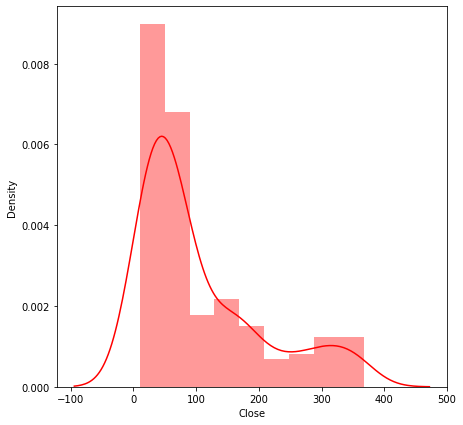

In [119]:
#  Plot the histogram to see Dependent variable 'Close' distribution whcih we need to predict later 

plt.figure(figsize=(7,7))
sns.distplot(stock_price_df['Close'],color="r")

*  The above distibution is not a **Normal Distribution**.It's a **Positively Skewed Distribution** .So,We need to convert it into Normal Distribution using **Log Tranformation**.




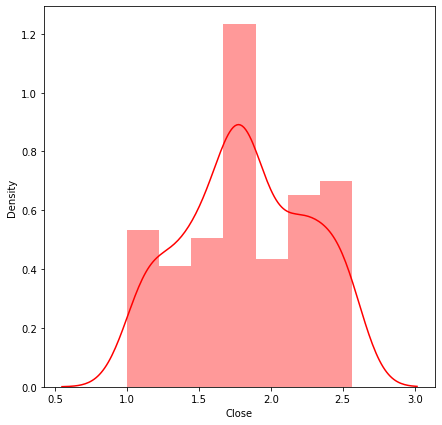

In [120]:
# Dependent variable 'Close' price of a stock

plt.figure(figsize=(7,7))
sns.distplot(np.log10(stock_price_df['Close']),color="r")

* It is not a perfect Normal Distribution Graph but it looks like    Normal Distribution Graph.

# Numerical Features:-

In [121]:
# Check the numerical columns in dataset

numeric_features = stock_price_df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

*   All the columns are numerical in the dataset.



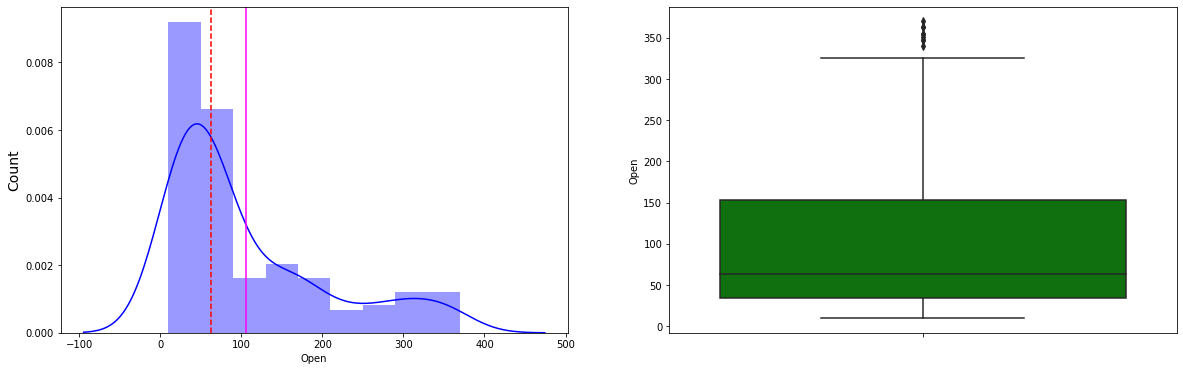

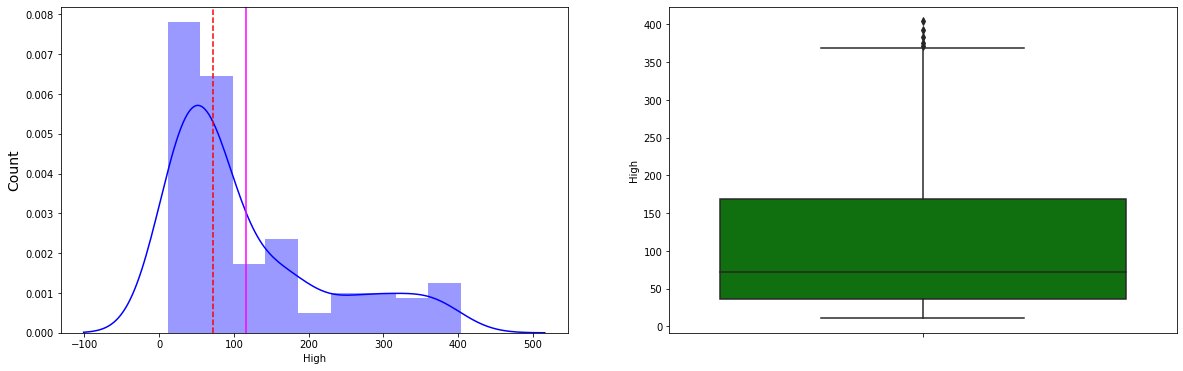

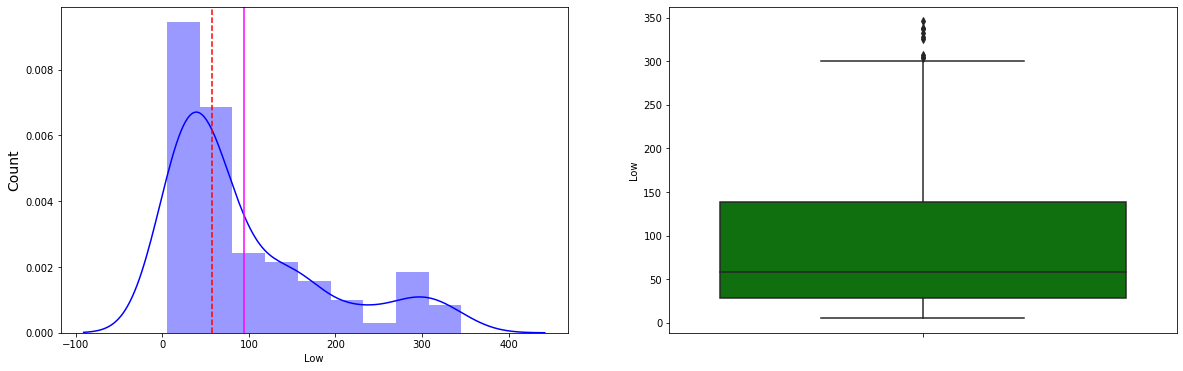

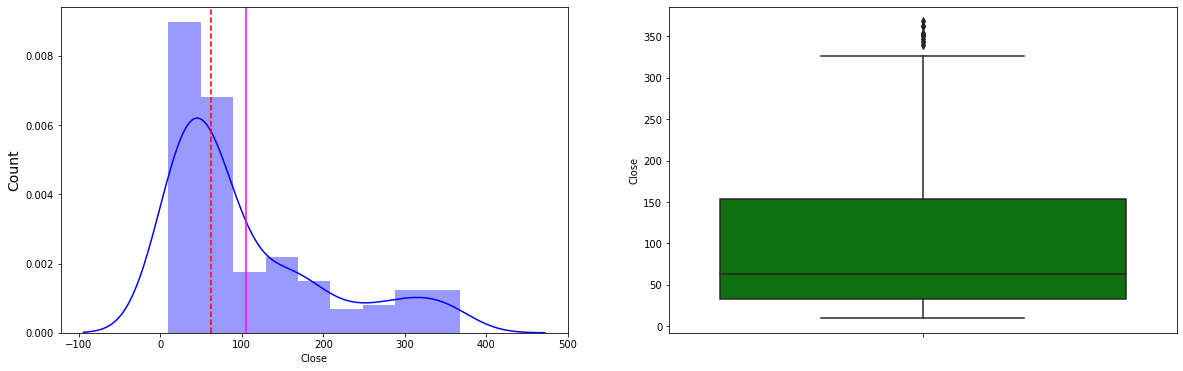

In [122]:
# plot a bar plot for each numerical feature and see the ditriution is normal or not

for col in numeric_features:
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(stock_price_df[col], color="blue")

# The Axes. axvline() function in axes module of matplotlib library is used to add a vertical line across the axis.
# It will show where the "mean" and "median" lie for each plot  

    plt.ylabel("Count", size=14)
    plt.axvline(stock_price_df[col].mean(),color='magenta',linewidth=1.5)
    plt.axvline(stock_price_df[col].median(),color='red',linestyle="dashed",linewidth=1.5)

# create boxplot to see if there is any outliers in any column or not
# use subplot() function of matplotlib to create boxplot in this figure itself

    plt.subplot(1, 2, 2)
    sns.boxplot(y=stock_price_df[col], color="green")
 
plt.show()

The above graph shows that they are not a normal distribution curve

# Log tranformation to convert features to Normal Distribution

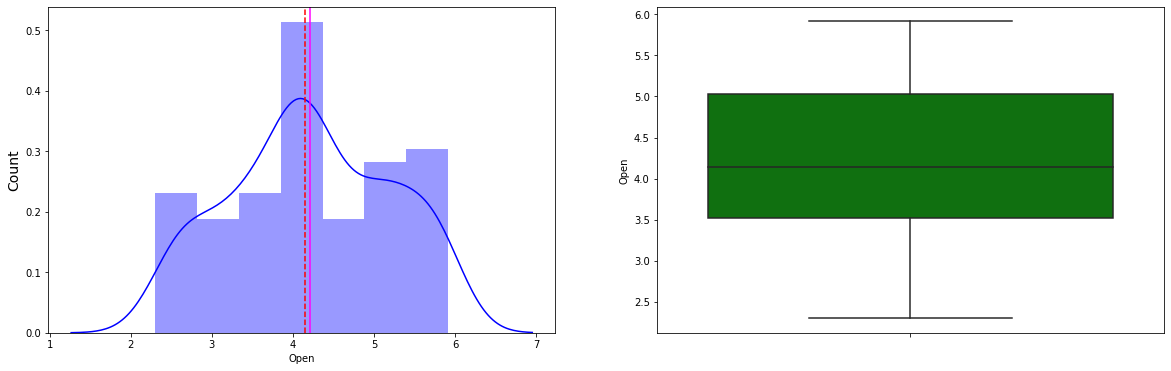

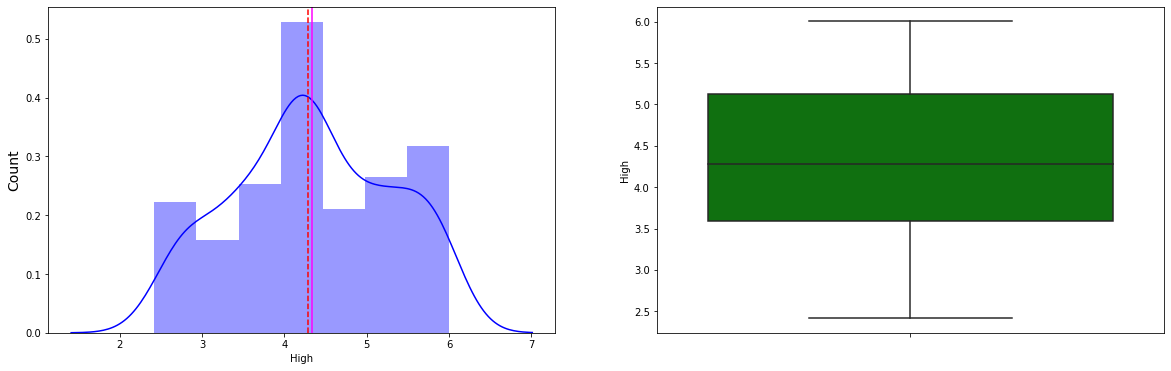

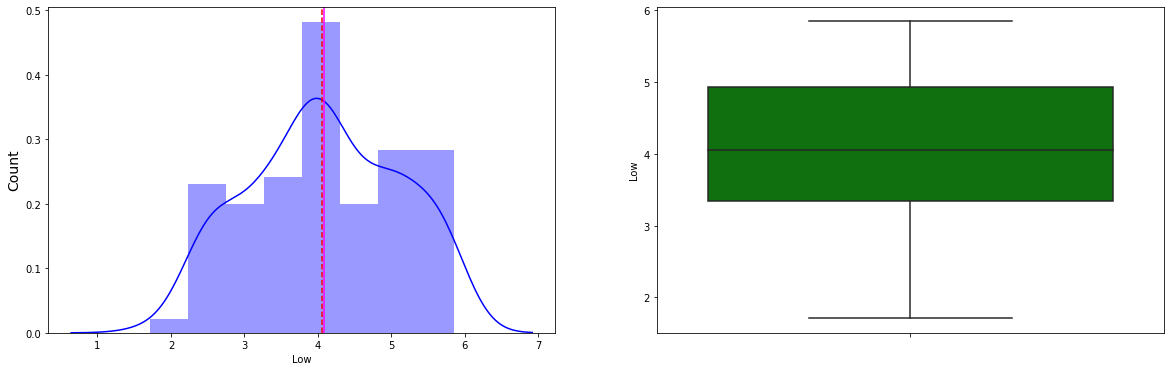

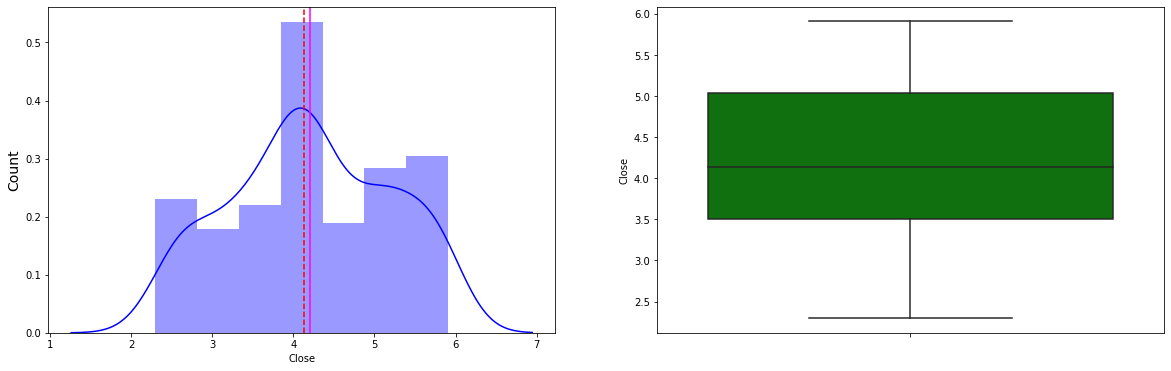

In [123]:
# log tranformation to convert a column to normal distribution

for col in numeric_features:
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)

# np.log() is a method in numpy library to convert our dataset values into log transformation to get a normal distribution curve

    feature_to_log = np.log(stock_price_df[col])  # assign log tranformation value into a variable 
    sns.distplot(feature_to_log, color="blue")

# The Axes. axvline() function in axes module of matplotlib library is used to add a vertical line across the axis.
# It will show where the "mean" and "median" lie for each plot  

    plt.ylabel("Count", size=14)
    plt.axvline(feature_to_log.mean(),color='magenta',linewidth=1.5)
    plt.axvline(feature_to_log.median(),color='red',linestyle="dashed",linewidth=1.5)

# create boxplot to see if there is any outliers in any column or not
# use subplot() function of matplotlib to create boxplot in this figure itself

    plt.subplot(1, 2, 2)
    sns.boxplot(y=feature_to_log, color="green")
 
plt.show()

# Check how the closing stock price vary after fraud case 2018

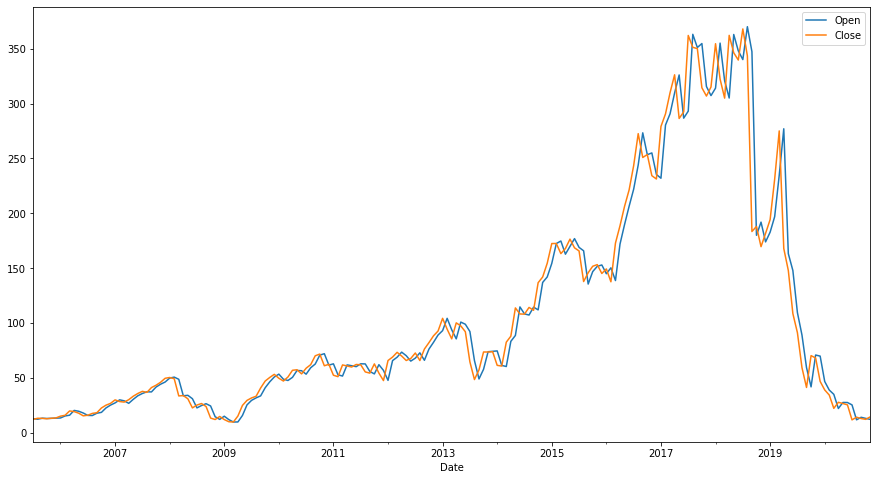

In [124]:
# Line plot to see how the "Open" and "Close" stock price of Yes Bank is affected after 2018 fraud case

stock_price_df[['Open','Close']].plot(kind='line',figsize=(15,8))

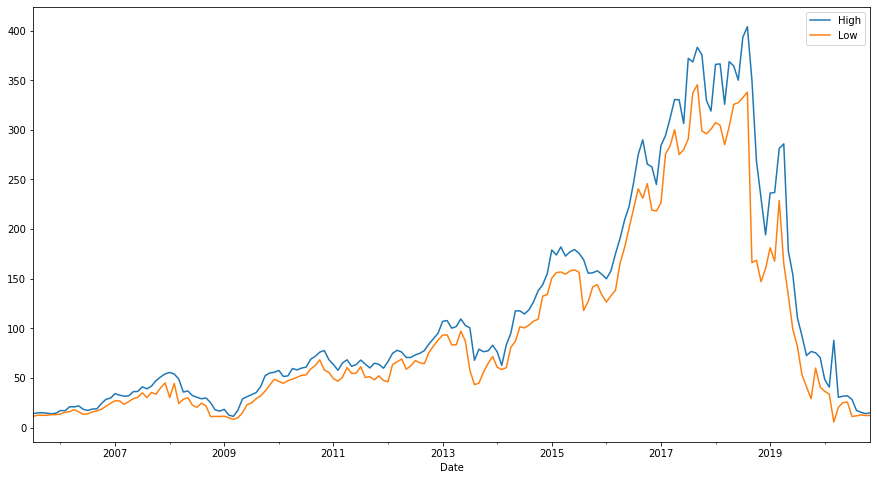

In [125]:
# Check how the "High" and "Low" stock are affected after 2018 fraud case

stock_price_df[['High','Low']].plot(kind='line',figsize=(15,8))

# Checking the minimum and maximum stock price data:-

# Creating dependent and independent varaiables:-


In [126]:
# Creating a dependent variable i.e 'y'
dependent_variable = stock_price_df.iloc[:,-1]
dependent_variable.values   # print column values into an array

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

In [127]:
# Create a list of independent variables i.e x1,x2,x3,.....xn
independent_variables = stock_price_df.iloc[:,:-1]
independent_variables

,Open,High,Low
Date,,,
2005-07-01,13.00,14.00,11.25
2005-08-01,12.58,14.88,12.55
2005-09-01,13.48,14.87,12.27
2005-10-01,13.20,14.47,12.40
2005-11-01,13.35,13.88,12.88
...,...,...,...
2020-07-01,25.60,28.30,11.10
2020-08-01,12.00,17.16,11.85
2020-09-01,14.30,15.34,12.75


# Use Heat Map to show correlation between all variables

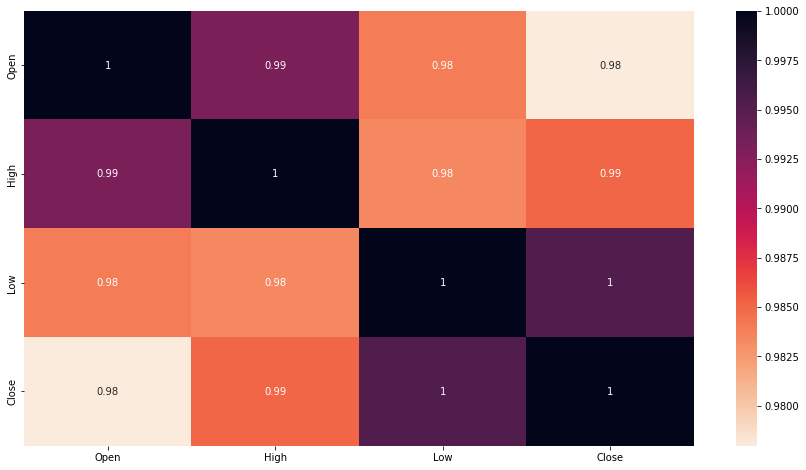

In [128]:
# Correlation between each and every column of the dataframe
plt.figure(figsize=(15,8))
correlation = stock_price_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='rocket_r')

# Plot the entire dataframe using PairGrid and check if there any relation between variables or not:-

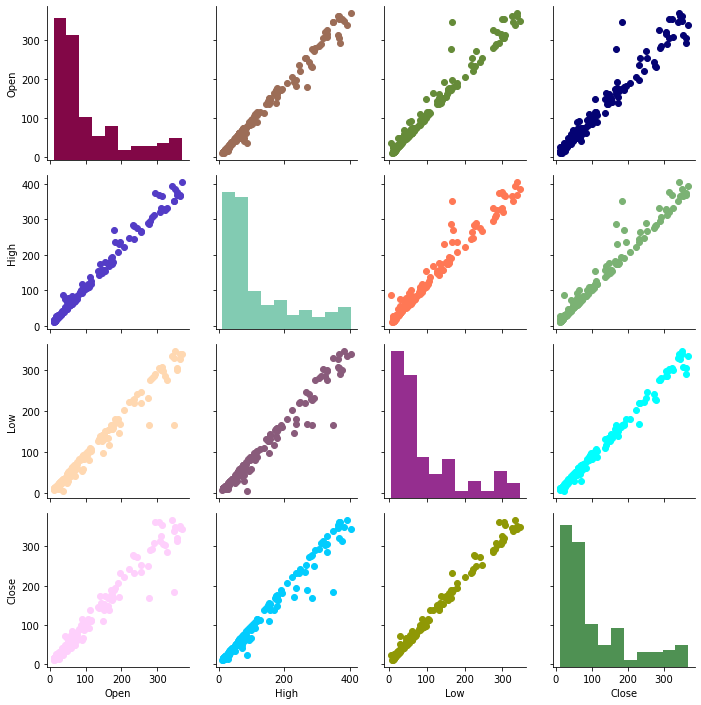

In [129]:
# It plot each and every column of our df with other column.
colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)

g = sns.PairGrid(stock_price_df)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)

# Checking correlation between dependent vs independent variable

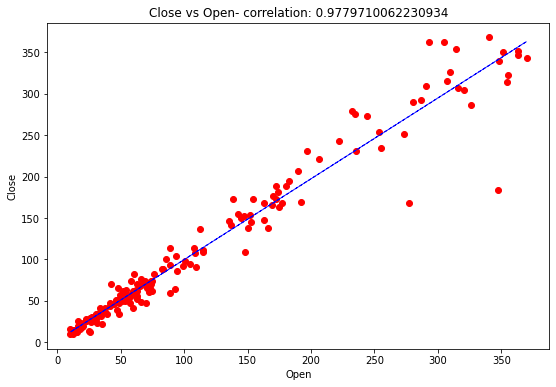

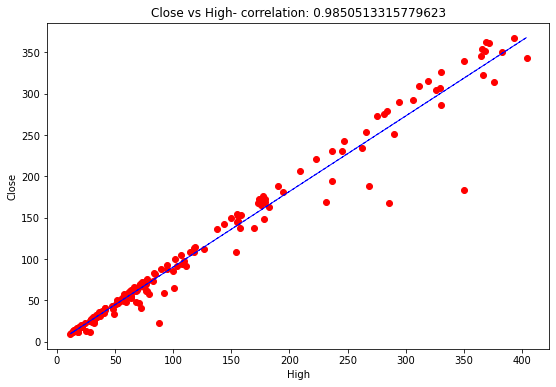

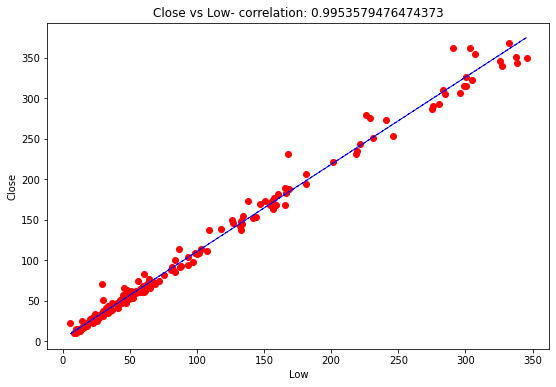

In [130]:
# find correlation betweeen different dependent variables "Close" to all independent variable

for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = stock_price_df[col] # store column in variable
    label = stock_price_df['Close']  # it store independent variable
    correlation = feature.corr(label)  # it calculate correlation between dependent vs independent variable
    plt.scatter(x=feature, y=label,c="r")    # use scatter plot to show correlation

    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))  # print correlation value with title on graph plotted below

    # let draw a line to make scatter plot more attractive to see correlation between values more clearly
    # use polyfit() function in numpy to draw a line that best fit the values 

    z = np.polyfit(stock_price_df[col], stock_price_df['Close'], 1)
    y_hat = np.poly1d(z)(stock_price_df[col])
    plt.plot(stock_price_df[col], y_hat,color="blue", lw=1,ls="dashed")

plt.show()

# Multicollinearity

In [131]:
# Multicollinearity

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [132]:
calc_vif(stock_price_df[[i for i in stock_price_df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


* VIF scores are high so it implies that associated independent variables are highly collinear to each other in the dataset.
* As all the variables are equally important for closing stock price prediction, so I will not be performing any kind of feature engineering here.

# Model Implementation

In [133]:
#applying zscore to each values of independent variable 

from scipy.stats import zscore  # zcore is used for scaling the data
X = round(independent_variables.apply(zscore),3)

In [134]:
#applying log on dependent variable 

Y = np.log10(dependent_variable)

In [135]:
# Split our data into train and test datasets 

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('Y_train: ',Y_train.shape)
print('Y_test: ',Y_test.shape)



X_train:  (148, 3)
X_test:  (37, 3)
Y_train:  (148,)
Y_test:  (37,)


In [136]:
#Creating DataFrames of test and train dataset
train_df = pd.DataFrame(X_train,Y_train)
test_df = pd.DataFrame(Y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)

# 1.Linear Regression

In [137]:
# Implementing Linear regression to fit the model
lin_reg = LinearRegression().fit(X_train, Y_train)

In [138]:
lin_reg.score(X_train, Y_train)

0.8091152094340809

In [139]:
lin_reg.coef_

array([-0.13270791,  0.29061643,  0.23265022])

In [140]:
len(lin_reg.coef_)

3

In [141]:
lin_reg.intercept_

1.8262495893435555

In [142]:
Y_pred = lin_reg.predict(X_test)

In [143]:
Y_pred

array([1.53276423, 1.96672923, 1.61039984, 1.95577646, 1.66713574,
       1.53291803, 2.3198133 , 1.47234925, 1.46174706, 2.27202742,
       2.59746859, 1.77196223, 2.0045669 , 1.63999469, 2.73573264,
       2.44754382, 1.69457789, 1.51594662, 2.45298264, 1.61176382,
       1.44547559, 1.87456785, 2.0156832 , 1.63781436, 2.25493358,
       1.63516541, 2.42563442, 1.46032674, 1.83171021, 1.62287589,
       2.8811247 , 2.77612524, 1.69605907, 2.0717636 , 1.56161009,
       1.59665024, 2.42253306])

In [144]:
test_df['LR Predicted Closing Price'] = Y_pred
test_df.head(5)

,Actual Closing Price,LR Predicted Closing Price
Date,,
2008-04-01,1.532245,1.532764
2015-12-01,2.162056,1.966729
2019-12-01,1.671636,1.610400
2014-11-01,2.152533,1.955776
2010-08-01,1.793930,1.667136


In [145]:
def evaluation_metrics(Y_pred):
  MSE = mean_squared_error(Y_test,Y_pred)
  print("Mean Squared Error: ",MSE)
  RMSE = np.sqrt(MSE)
  print("Root Mean Squared Error: ",RMSE)
  r2 = r2_score(Y_test,Y_pred)
  print("R2: ",r2)
  adjusted_r2 = 1-(1-r2_score(Y_test,Y_pred))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2: ",adjusted_r2)
  return

In [146]:
evaluation_metrics(Y_pred)

Mean Squared Error:  0.0319805266701623
Root Mean Squared Error:  0.1788310003052108
R2:  0.8283222778327901
Adjusted R2:  0.8127152121812256


In [147]:
def plot_actual_pred(Y_pred,Y_test):
   plt.figure(figsize=(12,8))
   plt.plot(10**(Y_pred),color="red" )
   plt.plot(np.array(10**(Y_test)))
   plt.legend(["Predicted","Actual"])
   plt.show()

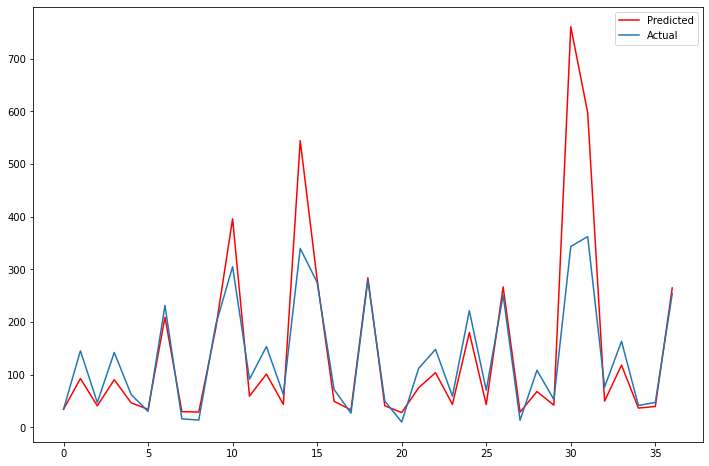

In [104]:
plot_actual_pred(Y_pred , Y_test)